In [ ]:
import os
import pandas as pd
import tqdm
import vaex
# import transformers

## Emotion Prediction with pretrained Roberta from hugging face: twitter-roberta-base-emotion-multilabel-latest.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

# Ensure CUDA (GPU support) is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion-multilabel-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion-multilabel-latest")
model.to(device)  # Move the model to GPU if available

def predict_emotions(text):
    # Check for NaN values
    if pd.isna(text):
        return "Unknown"

    # Tokenize the text and obtain model predictions
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    # Convert logits to probabilities
    probs = torch.sigmoid(logits)
    # Define the emotion labels
    labels = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"]
    # Get the labels of emotions with probability > 0.5 (or another threshold of your choice)
    predicted_emotions = [label for i, label in enumerate(labels) if probs[0][i] > 0.5]
    return ", ".join(predicted_emotions)





In [ ]:

# # Apply the function to your dataframe with tqdm for progress tracking
# df['emotions'] = [predict_emotions(text) for text in tqdm(df['caption_text_clean'])]

# # Display the first few rows to see the predicted emotions
# df[['caption_text_clean', 'emotions']].head()

In [ ]:
df.to_csv("df_with_emotions.csv", index= False)

In [ ]:
import pandas as pd
df_with_emotions = pd.read_csv("df_with_emotions.csv")
# df_with_emotions = df_with_emotions.dropna(subset=['caption_text_clean',"emotions"])



/tmp/ipykernel_30875/2451250045.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_with_emotions = pd.read_csv("df_with_emotions.csv")


In [ ]:
df_with_emotions = df_with_emotions[['state_name','meeting_date', 'caption_text_clean',
       'channelType', 'year', 'emotions']]

number of rows after droppinh NaN predictions: 93010


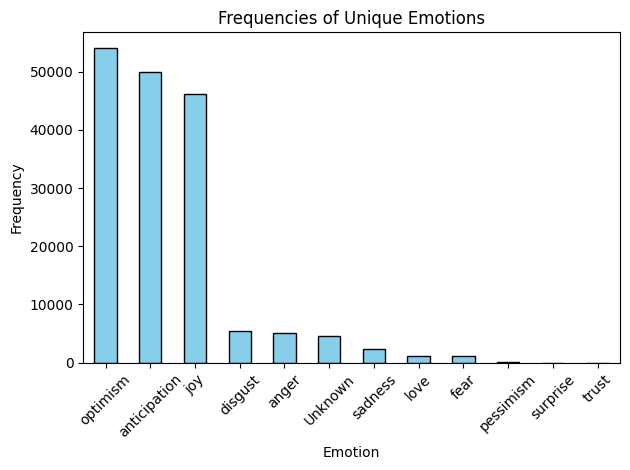

In [ ]:
import matplotlib.pyplot as plt

# Drop NaN rows in the 'emotions' column
df_with_emotions = df_with_emotions.dropna(subset=['emotions'])

print("number of rows after droppinh NaN predictions:", len(df_with_emotions))

# Split the emotions and explode the dataframe to have one emotion per row
df_exploded = df_with_emotions['emotions'].str.split(', ').explode()

# Plot the frequencies of unique emotions
df_exploded.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequencies of Unique Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Generating wordcloud of noun words

This dataset was generated at preprocessing step in the file "Topic_Modeling.ipynb". It contains a list of the unigram, bu-gram and 3-gram noun words appear in the caption_text_clean column, after several cleaning steps.

In [ ]:
import pandas as pd

# Load DataFrame from a pickle file
df = pd.read_pickle('final_df.pkl')
df



,state_name,year,caption_text_clean
0,Texas,2006,"[city, council, city, league, city, meeting, n..."
1,Texas,2006,"[everybody, city, council, city, council, twen..."
2,Texas,2006,"[honor, afternoon, call, order, city, council,..."
3,Texas,2006,"[afternoon, call, city, council, city, city, c..."
4,Texas,2006,"[afternoon, call, order, city, council, city, ..."
...,...,...,...
99185,Wyoming,2018,"[call, medicine, ball, call, pause, council, m..."
99186,Wyoming,2018,"[pause, resolution, city, pause, attorney, som..."
99187,Wyoming,2018,"[council, direction, regard, pause, plain, cou..."
99188,Wyoming,2018,"[change, agenda, fun, watch, guy, letter, yeah..."


In [ ]:
df_with_emotions["only_nouns"] = df["caption_text_clean"]
df_with_emotions = df_with_emotions.dropna(subset=['caption_text_clean',"emotions"])

df_with_emotions

,state_name,meeting_date,caption_text_clean,channelType,year,emotions,only_nouns
0,Texas,2006-11-14,tell me when okay fellas were up good evening ...,INDEPENDENT,2006,"joy, optimism","[city, council, city, league, city, meeting, n..."
1,Texas,2006-10-24,alright alright let welcome everybody we have ...,INDEPENDENT,2006,"joy, optimism","[everybody, city, council, city, council, twen..."
2,Texas,2006-12-12,your honor okay good afternoon will call to or...,INDEPENDENT,2006,"joy, optimism","[honor, afternoon, call, order, city, council,..."
3,Texas,2006-11-28,okay good afternoon we will call the city coun...,INDEPENDENT,2006,"joy, optimism","[afternoon, call, city, council, city, city, c..."
4,Texas,2006-10-10,okay we are up good afternoon we call to order...,INDEPENDENT,2006,"joy, optimism","[afternoon, call, order, city, council, city, ..."
...,...,...,...,...,...,...,...
99184,Wyoming,2018-02-20,roll call pledge of allegiance municipal court...,OFFICIAL GOVT,2018,anticipation,"[roll, call, pledge, allegiance, court, judge,..."
99185,Wyoming,2018-02-06,i now call the february th so i have cold medi...,OFFICIAL GOVT,2018,anticipation,"[call, medicine, ball, call, pause, council, m..."
99186,Wyoming,2018-02-06,we are and out i think it said and and then ha...,OFFICIAL GOVT,2018,"anger, disgust","[pause, resolution, city, pause, attorney, som..."
99187,Wyoming,2018-01-16,the council that i would like to get some of y...,OFFICIAL GOVT,2018,"anticipation, optimism","[council, direction, regard, pause, plain, cou..."


In [ ]:
dataset_word_cloud = df_with_emotions[["emotions"	,"only_nouns"]]
dataset_word_cloud

,emotions,only_nouns
0,"joy, optimism","[city, council, city, league, city, meeting, n..."
1,"joy, optimism","[everybody, city, council, city, council, twen..."
2,"joy, optimism","[honor, afternoon, call, order, city, council,..."
3,"joy, optimism","[afternoon, call, city, council, city, city, c..."
4,"joy, optimism","[afternoon, call, order, city, council, city, ..."
...,...,...
99184,anticipation,"[roll, call, pledge, allegiance, court, judge,..."
99185,anticipation,"[call, medicine, ball, call, pause, council, m..."
99186,"anger, disgust","[pause, resolution, city, pause, attorney, som..."
99187,"anticipation, optimism","[council, direction, regard, pause, plain, cou..."


In [ ]:
from tqdm import tqdm
tqdm.pandas()

Dropping popular nouns that are not related to any emotion (before creating the wordclouds):

In [ ]:
import pandas as pd

# Sample data


# Words to remove
remove_words = ["second", "pause", "uh", "um", "think", "know", "well", "one", "going", "right", "see", "something", "kind", "thing"]

# Remove words from the noun lists
dataset_word_cloud['only_nouns'] = dataset_word_cloud['only_nouns'].apply(lambda x: [word for word in x if word not in remove_words])


/tmp/ipykernel_7927/4074698658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_word_cloud['only_nouns'] = dataset_word_cloud['only_nouns'].apply(lambda x: [word for word in x if word not in remove_words])


Word Cloud generation. The images were saved in the wordcloud folder.

In [ ]:
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm

# List of unique emotions
unique_emotions = set(', '.join(dataset_word_cloud['emotions'].dropna()).split(', '))

# Create a directory to save word clouds
os.makedirs("wordclouds", exist_ok=True)

# Create a word cloud for each unique emotion
for emotion in tqdm(unique_emotions, desc="Processing emotions"):
    # Check if the word cloud file already exists
    file_path = f"wordclouds/{emotion}_wordcloud.png"
    if os.path.exists(file_path):
        print(f"Word cloud for {emotion} already exists. Skipping...")
        continue

    # Filter rows containing the current emotion
    emotion_rows = dataset_word_cloud[dataset_word_cloud['emotions'].str.contains(emotion, na=False)]

    # Extract and flatten the nouns lists, then join them into a single string
    text = ' '.join(noun for sublist in tqdm(emotion_rows['only_nouns'], desc=f"Processing nouns for {emotion}", leave=False) for noun in sublist)

    # Generate the word cloud with reduced dimensions
    wordcloud = WordCloud(width=400, height=200, background_color='white', stopwords=STOPWORDS).generate(text)

    # Save the word cloud to a file
    wordcloud.to_file(file_path)

    # Display the word cloud (optional)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion}')
    plt.show()


In [ ]:
df_with_emotions

,state_name,meeting_date,caption_text_clean,channelType,year,emotions,only_nouns
0,Texas,2006-11-14,tell me when okay fellas were up good evening ...,INDEPENDENT,2006,"joy, optimism","[city, council, city, league, city, meeting, n..."
1,Texas,2006-10-24,alright alright let welcome everybody we have ...,INDEPENDENT,2006,"joy, optimism","[everybody, city, council, city, council, twen..."
2,Texas,2006-12-12,your honor okay good afternoon will call to or...,INDEPENDENT,2006,"joy, optimism","[honor, afternoon, call, order, city, council,..."
3,Texas,2006-11-28,okay good afternoon we will call the city coun...,INDEPENDENT,2006,"joy, optimism","[afternoon, call, city, council, city, city, c..."
4,Texas,2006-10-10,okay we are up good afternoon we call to order...,INDEPENDENT,2006,"joy, optimism","[afternoon, call, order, city, council, city, ..."
...,...,...,...,...,...,...,...
99184,Wyoming,2018-02-20,roll call pledge of allegiance municipal court...,OFFICIAL GOVT,2018,anticipation,"[roll, call, pledge, allegiance, court, judge,..."
99185,Wyoming,2018-02-06,i now call the february th so i have cold medi...,OFFICIAL GOVT,2018,anticipation,"[call, medicine, ball, call, pause, council, m..."
99186,Wyoming,2018-02-06,we are and out i think it said and and then ha...,OFFICIAL GOVT,2018,"anger, disgust","[pause, resolution, city, pause, attorney, som..."
99187,Wyoming,2018-01-16,the council that i would like to get some of y...,OFFICIAL GOVT,2018,"anticipation, optimism","[council, direction, regard, pause, plain, cou..."


## Analysis the emotions by years:

In [ ]:
years_emotions = df_with_emotions[["year","emotions"]]
years_emotions

,year,emotions
0,2006,"joy, optimism"
1,2006,"joy, optimism"
2,2006,"joy, optimism"
3,2006,"joy, optimism"
4,2006,"joy, optimism"
...,...,...
99184,2018,anticipation
99185,2018,anticipation
99186,2018,"anger, disgust"
99187,2018,"anticipation, optimism"


In [ ]:
import pandas as pd

# Splitting the emotions column into individual emotions
years_emotions = years_emotions.assign(emotions=years_emotions['emotions'].str.split(', ')).explode('emotions')

# Counting the appearances of each unique emotion for each year
emotion_counts = years_emotions.groupby(['year', 'emotions']).size().reset_index(name='emotion_count')

# Counting the number of records for each year
year_counts = years_emotions.groupby('year').size().reset_index(name='year_count')

# Merging the two dataframes on the 'year' column
merged_df = pd.merge(emotion_counts, year_counts, on='year')

# Calculating the normalized emotion frequency
merged_df['normalized_emotion_frequency'] = merged_df['emotion_count'] / merged_df['year_count']

# Creating the final dataframe with desired columns
result_df = merged_df[['year', 'emotions', 'normalized_emotion_frequency']]

result_df.to_csv("year_emotion.csv", index = False)
result_df

,year,emotions,normalized_emotion_frequency
0,2006,anticipation,0.125000
1,2006,joy,0.437500
2,2006,optimism,0.437500
3,2007,anticipation,0.176471
4,2007,joy,0.352941
...,...,...,...
137,2022,joy,0.286110
138,2022,love,0.005862
139,2022,optimism,0.332193
140,2022,sadness,0.013624


In [ ]:
import pandas as pd
year_emotion = pd.read_csv("year_emotion.csv")

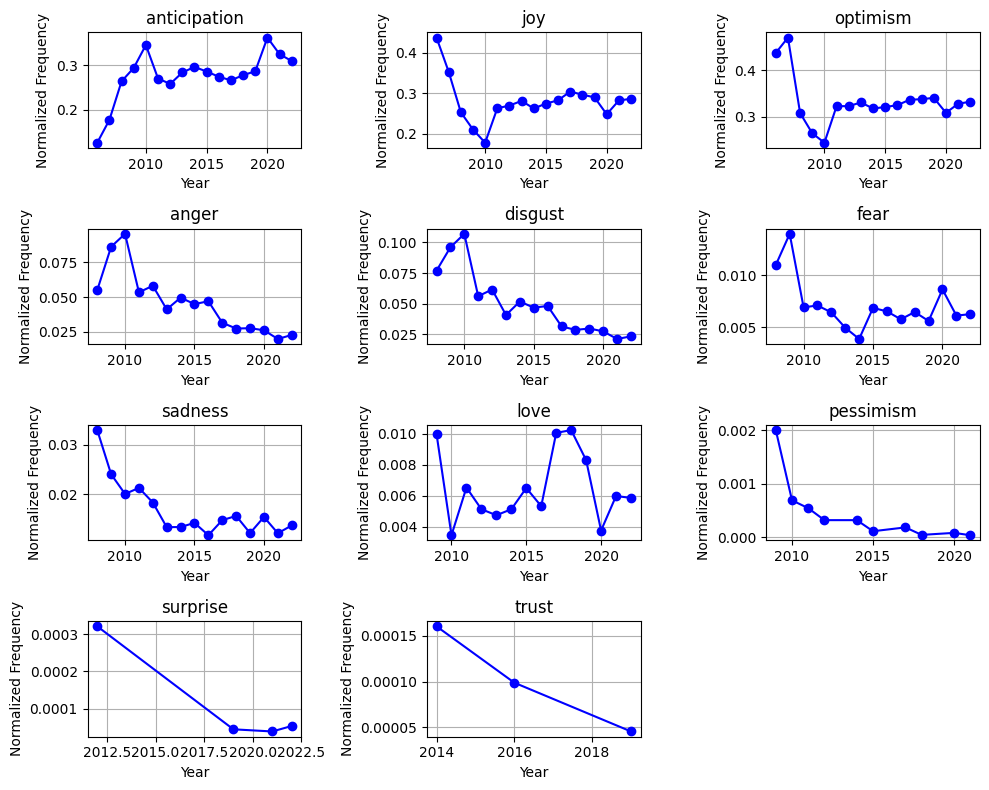

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots in a grid format with adjusted size
fig, axes = plt.subplots(4, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.ravel()

for i, emotion in enumerate(year_emotion['emotions'].unique()):
    subset = year_emotion[year_emotion['emotions'] == emotion]
    axes[i].plot(subset['year'], subset['normalized_emotion_frequency'], marker='o', color='b')
    axes[i].set_title(emotion)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Normalized Frequency')
    axes[i].grid(True)

# Remove any unused subplots
for j in range(i+1, 12):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the plots as an image
fig.savefig("emotions_over_years.png", dpi=1000)

plt.show()



Printing the results for inference:

In [ ]:
import pandas as pd
# Print the values for each emotion over the years
for emotion in year_emotion['emotions'].unique():
    print(f"Emotion: {emotion}")
    subset = year_emotion[year_emotion['emotions'] == emotion]
    for _, row in subset.iterrows():
        print(f"Year: {row['year']}, Normalized Frequency: {row['normalized_emotion_frequency']:.6f}")
    print("-" * 40)


Emotion: anticipation
Year: 2006, Normalized Frequency: 0.125000
Year: 2007, Normalized Frequency: 0.176471
Year: 2008, Normalized Frequency: 0.263736
Year: 2009, Normalized Frequency: 0.294000
Year: 2010, Normalized Frequency: 0.345756
Year: 2011, Normalized Frequency: 0.270153
Year: 2012, Normalized Frequency: 0.257858
Year: 2013, Normalized Frequency: 0.283817
Year: 2014, Normalized Frequency: 0.296249
Year: 2015, Normalized Frequency: 0.285910
Year: 2016, Normalized Frequency: 0.274181
Year: 2017, Normalized Frequency: 0.266016
Year: 2018, Normalized Frequency: 0.277740
Year: 2019, Normalized Frequency: 0.286447
Year: 2020, Normalized Frequency: 0.362628
Year: 2021, Normalized Frequency: 0.325022
Year: 2022, Normalized Frequency: 0.309667
----------------------------------------
Emotion: joy
Year: 2006, Normalized Frequency: 0.437500
Year: 2007, Normalized Frequency: 0.352941
Year: 2008, Normalized Frequency: 0.252747
Year: 2009, Normalized Frequency: 0.210000
Year: 2010, Normalize

## States Emotions analysis (section 4.3.2)

In [ ]:
states_emotions = df_with_emotions[["state_name", "emotions"]]
states_emotions = states_emotions.dropna()
states_emotions

,state_name,emotions
0,Texas,"joy, optimism"
1,Texas,"joy, optimism"
2,Texas,"joy, optimism"
3,Texas,"joy, optimism"
4,Texas,"joy, optimism"
...,...,...
99184,Wyoming,anticipation
99185,Wyoming,anticipation
99186,Wyoming,"anger, disgust"
99187,Wyoming,"anticipation, optimism"


Agregate the emotions (words) of each unique state (document):

In [ ]:
import pandas as pd
from tqdm import tqdm

state_emotion_dict = {}

for row in tqdm(states_emotions.itertuples(index=False), total=states_emotions.shape[0]):
    state = row.state_name
    emotions = row.emotions.split(', ')

    if state not in state_emotion_dict:
        state_emotion_dict[state] = []

    state_emotion_dict[state].extend(emotions)

print(list(state_emotion_dict.items())[3])

100%|██████████| 93006/93006 [00:00<00:00, 569014.72it/s]

('South Carolina', ['joy', 'optimism', 'anger', 'disgust', 'anger', 'disgust', 'anticipation', 'anticipation', 'joy', 'optimism', 'anger', 'joy', 'joy', 'love', 'optimism', 'joy', 'love', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'anticipation', 'optimism', 'anticipation', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'anticipation', 'joy', 'optimism', 'anticipation', 'optimism', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'anticipation', 'joy', 'optimism', 'anticipation', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'sadness', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'anger', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy', 'optimism', 'joy

TFIDF calculation for each state-emotion pair:

In [ ]:
import pandas as pd
from tqdm import tqdm
import math

def compute_tfidf(state_emotion_dict):
    # Compute the total number of states (documents)
    total_states = len(state_emotion_dict)
    print("total states:",total_states)
    # Build a list of all emotions from all states
    all_emotions = []
    for emotions in state_emotion_dict.values():
        all_emotions.extend(emotions)

    # Find unique emotions
    unique_emotions = list(set(all_emotions))

    # Compute IDF for each emotion
    idf = {}
    for emotion in tqdm(unique_emotions, desc="Computing IDF"):
        print("emotion",emotion)
        count_states_with_emotion = sum(1 for emotions in state_emotion_dict.values() if emotion in emotions)
        print(f"count states with {emotion}:",count_states_with_emotion)
        idf[emotion] = math.pow((total_states) / (count_states_with_emotion),2)
        print(f"IDF of {emotion}:", idf[emotion])
    # Compute TF-IDF matrix
    tfidf_data = []
    for state, emotions in tqdm(state_emotion_dict.items(), desc="Computing TF-IDF"):
        tfidf_scores = {"state": state}
        total_emotions_in_state = len(emotions)

        for emotion in unique_emotions:
            tf = math.sqrt(emotions.count(emotion) / total_emotions_in_state)
            # print(f"tf of state {state} with {emotion}", tf)
            tfidf_scores[emotion] = tf * idf[emotion]

        tfidf_data.append(tfidf_scores)

    return pd.DataFrame(tfidf_data)

tfidf_df = compute_tfidf(state_emotion_dict)
tfidf_df

total states: 48


Computing IDF: 100%|██████████| 12/12 [00:00<00:00, 1221.61it/s]


emotion Unknown
count states with Unknown: 47
IDF of Unknown: 1.0430058850158441
emotion love
count states with love: 44
IDF of love: 1.190082644628099
emotion surprise
count states with surprise: 4
IDF of surprise: 144.0
emotion anticipation
count states with anticipation: 48
IDF of anticipation: 1.0
emotion fear
count states with fear: 46
IDF of fear: 1.0888468809073724
emotion optimism
count states with optimism: 47
IDF of optimism: 1.0430058850158441
emotion joy
count states with joy: 48
IDF of joy: 1.0
emotion sadness
count states with sadness: 45
IDF of sadness: 1.1377777777777778
emotion disgust
count states with disgust: 47
IDF of disgust: 1.0430058850158441
emotion trust
count states with trust: 3
IDF of trust: 256.0
emotion pessimism
count states with pessimism: 8
IDF of pessimism: 36.0
emotion anger
count states with anger: 46
IDF of anger: 1.0888468809073724


Computing TF-IDF: 100%|██████████| 48/48 [00:00<00:00, 1172.03it/s]


,state,Unknown,love,surprise,anticipation,fear,optimism,joy,sadness,disgust,trust,pessimism,anger
0,Texas,0.124964,0.132335,0.000000,0.489370,0.093606,0.602265,0.544626,0.155249,0.205825,3.051947,0.000000,0.214086
1,Alabama,0.149613,0.077798,0.000000,0.444800,0.077491,0.646179,0.568649,0.099172,0.170585,3.220699,0.000000,0.190307
2,California,0.189244,0.099601,0.000000,0.551398,0.106793,0.578282,0.495744,0.144204,0.207674,1.749367,0.492009,0.210320
3,South Carolina,0.233286,0.091545,0.000000,0.367449,0.087482,0.648652,0.577506,0.105555,0.193525,0.000000,0.000000,0.215769
4,Arkansas,0.111429,0.099738,0.000000,0.426308,0.085360,0.651936,0.596301,0.095354,0.141623,0.000000,0.000000,0.161315
5,Minnesota,0.213925,0.077691,0.000000,0.617542,0.074442,0.547592,0.488667,0.110008,0.155653,0.000000,0.731099,0.158431
6,North Carolina,0.143344,0.129158,0.000000,0.454533,0.089730,0.642223,0.572614,0.142584,0.135051,0.000000,0.000000,0.139642
7,Ohio,0.169784,0.088001,1.476632,0.491355,0.082805,0.595398,0.522974,0.125660,0.243188,0.000000,0.369158,0.254612
8,Oregon,0.144504,0.060430,0.000000,0.549641,0.080334,0.603085,0.525527,0.124807,0.160836,0.000000,0.000000,0.169915
9,Illinois,0.184727,0.086693,0.000000,0.560912,0.081062,0.561310,0.514644,0.163448,0.198776,0.000000,0.390935,0.193569


The most dominant emotion for each state (argmax on tfidf entries of that state):

In [ ]:
import pandas as pd


# Drop the 'state' column to focus on the emotion columns
emotion_columns = tfidf_df.drop('state', axis=1)

# Use idxmax() to get the column name of the maximum value in each row
tfidf_df['Dominant Emotion'] = emotion_columns.idxmax(axis=1)

# Extract the state and its corresponding dominant emotion
dominant_emotion_per_state = tfidf_df[['state', 'Dominant Emotion']]

print(dominant_emotion_per_state)

             state Dominant Emotion
0            Texas            trust
1          Alabama            trust
2       California            trust
3   South Carolina         optimism
4         Arkansas         optimism
5        Minnesota        pessimism
6   North Carolina         optimism
7             Ohio         surprise
8           Oregon         optimism
9         Illinois         optimism
10    Pennsylvania         optimism
11        Nebraska         optimism
12        New York     anticipation
13       Wisconsin     anticipation
14   Massachusetts         surprise
15      New Jersey     anticipation
16         Indiana     anticipation
17        Michigan         optimism
18     Mississippi         optimism
19        Missouri         optimism
20    South Dakota         surprise
21       Tennessee     anticipation
22         Florida         optimism
23        Virginia         optimism
24         Arizona        pessimism
25        Colorado         optimism
26          Nevada         o

top 3 dominant emotions for each state:

In [ ]:
import pandas as pd

# Function to retrieve the top 3 emotions for each state
def top_3_emotions(row):
    emotions = row.index[1:]  # Excluding 'state'
    top_3 = sorted(emotions, key=lambda x: row[x], reverse=True)[:3]
    return top_3

tfidf_df['Top 3 Emotions'] = tfidf_df.apply(top_3_emotions, axis=1)

# Extract state and top 3 emotions
result = tfidf_df[['state', 'Top 3 Emotions']]

print(result)


             state                       Top 3 Emotions
0            Texas               [trust, optimism, joy]
1          Alabama               [trust, optimism, joy]
2       California      [trust, optimism, anticipation]
3   South Carolina        [optimism, joy, anticipation]
4         Arkansas        [optimism, joy, anticipation]
5        Minnesota  [pessimism, anticipation, optimism]
6   North Carolina        [optimism, joy, anticipation]
7             Ohio            [surprise, optimism, joy]
8           Oregon        [optimism, anticipation, joy]
9         Illinois        [optimism, anticipation, joy]
10    Pennsylvania        [optimism, joy, anticipation]
11        Nebraska        [optimism, anticipation, joy]
12        New York        [anticipation, optimism, joy]
13       Wisconsin        [anticipation, optimism, joy]
14   Massachusetts   [surprise, anticipation, optimism]
15      New Jersey        [anticipation, optimism, joy]
16         Indiana        [anticipation, optimis

PCA visualization:

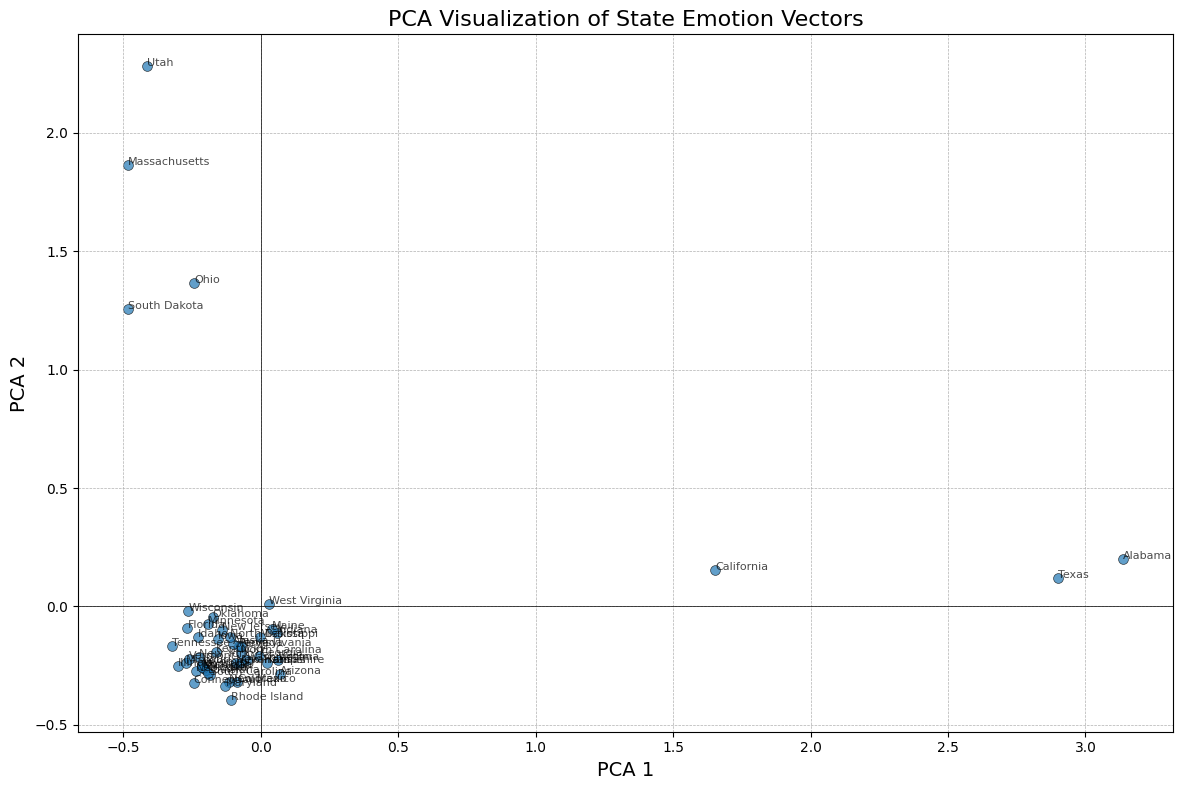

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming tfidf_df is already defined from the previous code block

# Extract the emotion data and states
X = tfidf_df.drop(columns=['state']).values
states = tfidf_df['state'].values

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
jitter = 0.1  # Start with this value and adjust if necessary
X_pca_jittered = X_pca + np.random.normal(0, jitter, X_pca.shape)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusting the size for better visibility
scatter = ax.scatter(X_pca_jittered[:, 0], X_pca_jittered[:, 1],
                     s=50, edgecolors="k", linewidth=0.5, alpha=0.7)  # Styling the scatter points

# Annotations: add state names as text labels
for i, state in enumerate(states):
    ax.annotate(state, (X_pca_jittered[i, 0], X_pca_jittered[i, 1]), fontsize=8, alpha=0.7)

# Add titles and labels
ax.set_title("PCA Visualization of State Emotion Vectors", fontsize=16)
ax.set_xlabel("PCA 1", fontsize=14)
ax.set_ylabel("PCA 2", fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.savefig('state_emotion_pca.png', dpi=1000)  # Save the plot as a PNG image with 300 dpi resolution
plt.show()


PCA visualization for 3D space:

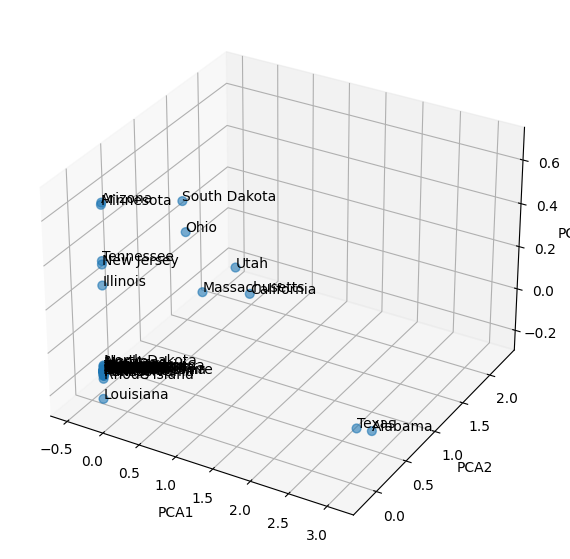

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=40, alpha=0.6)
ax.autoscale_view()

# Label axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Optional: Add state names as annotations to each point.
# Note: In a crowded plot this can look messy, so use it judiciously.
for i, state in enumerate(states):
    ax.text(X_pca_3d[i, 0], X_pca_3d[i, 1], X_pca_3d[i, 2], state)

plt.show()

Finding the best number of clusters withthe ELBOW method:

/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

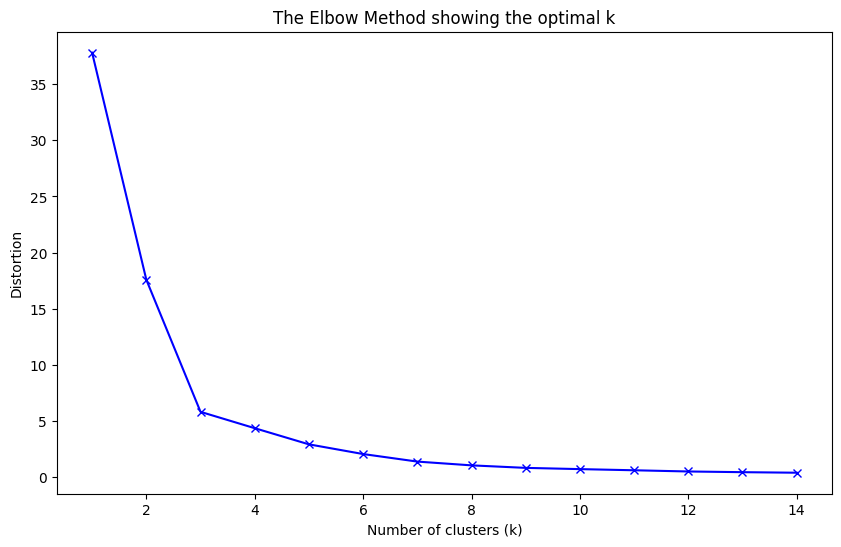

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute the sum of squared distances for a range of cluster numbers
distortions = []
K = range(1,15)  # Check for up to 15 clusters, can be adjusted
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Save the figure
plt.savefig("elbow_method_plot.png", dpi=300, bbox_inches='tight')  # Saves with high resolution (300 dpi)

plt.show()

We picked k = 3. The following code show the clusters we got drom K-means:

In [ ]:
from sklearn.cluster import KMeans

# Determine the number of clusters. For this example, I'll use 5 clusters, but you can adjust this.
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Map clusters to states
cluster_to_states = {}
for cluster_num in range(n_clusters):
    states_in_cluster = states[clusters == cluster_num]
    cluster_to_states[cluster_num] = states_in_cluster

# Display states for each cluster
for cluster, states_in_cluster in cluster_to_states.items():
    print(f"Cluster {cluster}:")
    for state in states_in_cluster:
        print(f"   {state}")
    print("\n")

Cluster 0:
   South Carolina
   Arkansas
   Minnesota
   North Carolina
   Oregon
   Illinois
   Pennsylvania
   Nebraska
   New York
   Wisconsin
   New Jersey
   Indiana
   Michigan
   Mississippi
   Missouri
   Tennessee
   Florida
   Virginia
   Arizona
   Colorado
   Nevada
   Oklahoma
   Washington
   Maine
   New Hampshire
   Georgia
   Montana
   West Virginia
   Kentucky
   Iowa
   Vermont
   Rhode Island
   New Mexico
   Idaho
   Kansas
   Louisiana
   Maryland
   Wyoming
   Alaska
   Connecticut
   North Dakota


Cluster 1:
   Texas
   Alabama
   California


Cluster 2:
   Ohio
   Massachusetts
   South Dakota
   Utah




/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering:

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Assuming X is already defined from previous code

# 1. Compute the cosine distance matrix.
distance_matrix = pdist(X, metric='cosine')
distance_matrix = squareform(distance_matrix)

# 2. Perform hierarchical clustering using the precomputed distance matrix.
cluster_model = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=3)
cluster_labels = cluster_model.fit_predict(distance_matrix)

# 3. Extract clusters and display them.
clusters = {}
for idx, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(states[idx])

# Print the clusters
for cluster, members in clusters.items():
    print("Cluster", cluster, ":\n   ", "\n   ".join(members), "\n")


Cluster 1 :
    Texas
   Alabama
   California 

Cluster 0 :
    South Carolina
   Arkansas
   Minnesota
   North Carolina
   Oregon
   Illinois
   Pennsylvania
   Nebraska
   New York
   Wisconsin
   New Jersey
   Indiana
   Michigan
   Mississippi
   Missouri
   Tennessee
   Florida
   Virginia
   Arizona
   Colorado
   Nevada
   Oklahoma
   Washington
   Maine
   New Hampshire
   Georgia
   Montana
   West Virginia
   Kentucky
   Iowa
   Vermont
   Rhode Island
   New Mexico
   Idaho
   Kansas
   Louisiana
   Maryland
   Wyoming
   Alaska
   Connecticut
   North Dakota 

Cluster 2 :
    Ohio
   Massachusetts
   South Dakota
   Utah 



/home/adamu/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


/tmp/ipykernel_30875/653428796.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average')


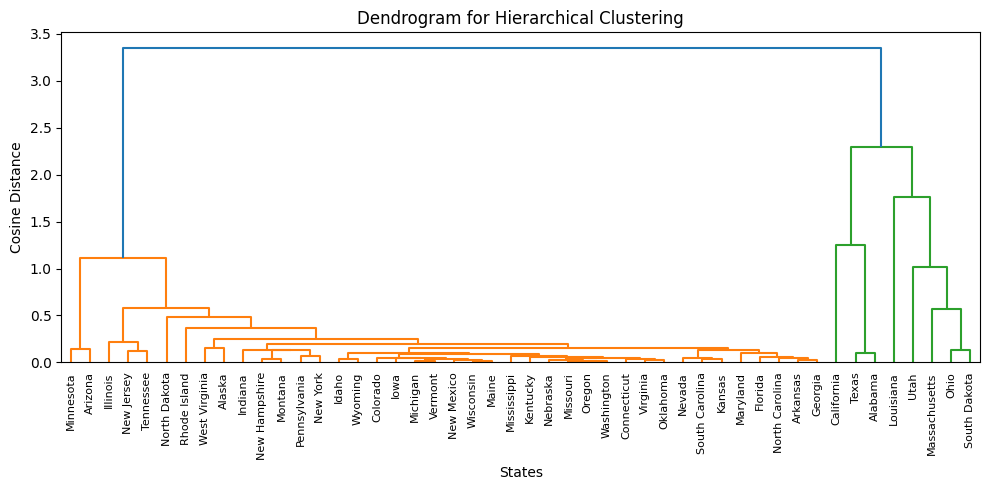

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix using the 'average' method and cosine distances.
Z = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=states, orientation='top', leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('States')
plt.ylabel('Cosine Distance')
plt.tight_layout()
plt.show()


In the following code we build a graph where each edge weight represents the strength of cosine similarity of 2 nodes (states).

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
# Compute pairwise similarities (cosine similarity)
similarity_matrix = cosine_similarity(X)
# Create a new graph
G_weighted = nx.Graph()

# Add nodes
for state in states:
    G_weighted.add_node(state)

# Add edges with weights (scaled for visualization)
for i in range(len(states)):
    for j in range(i+1, len(states)):
        G_weighted.add_edge(states[i], states[j], weight=similarity_matrix[i][j])



Ploting the MST of the above generated graph:

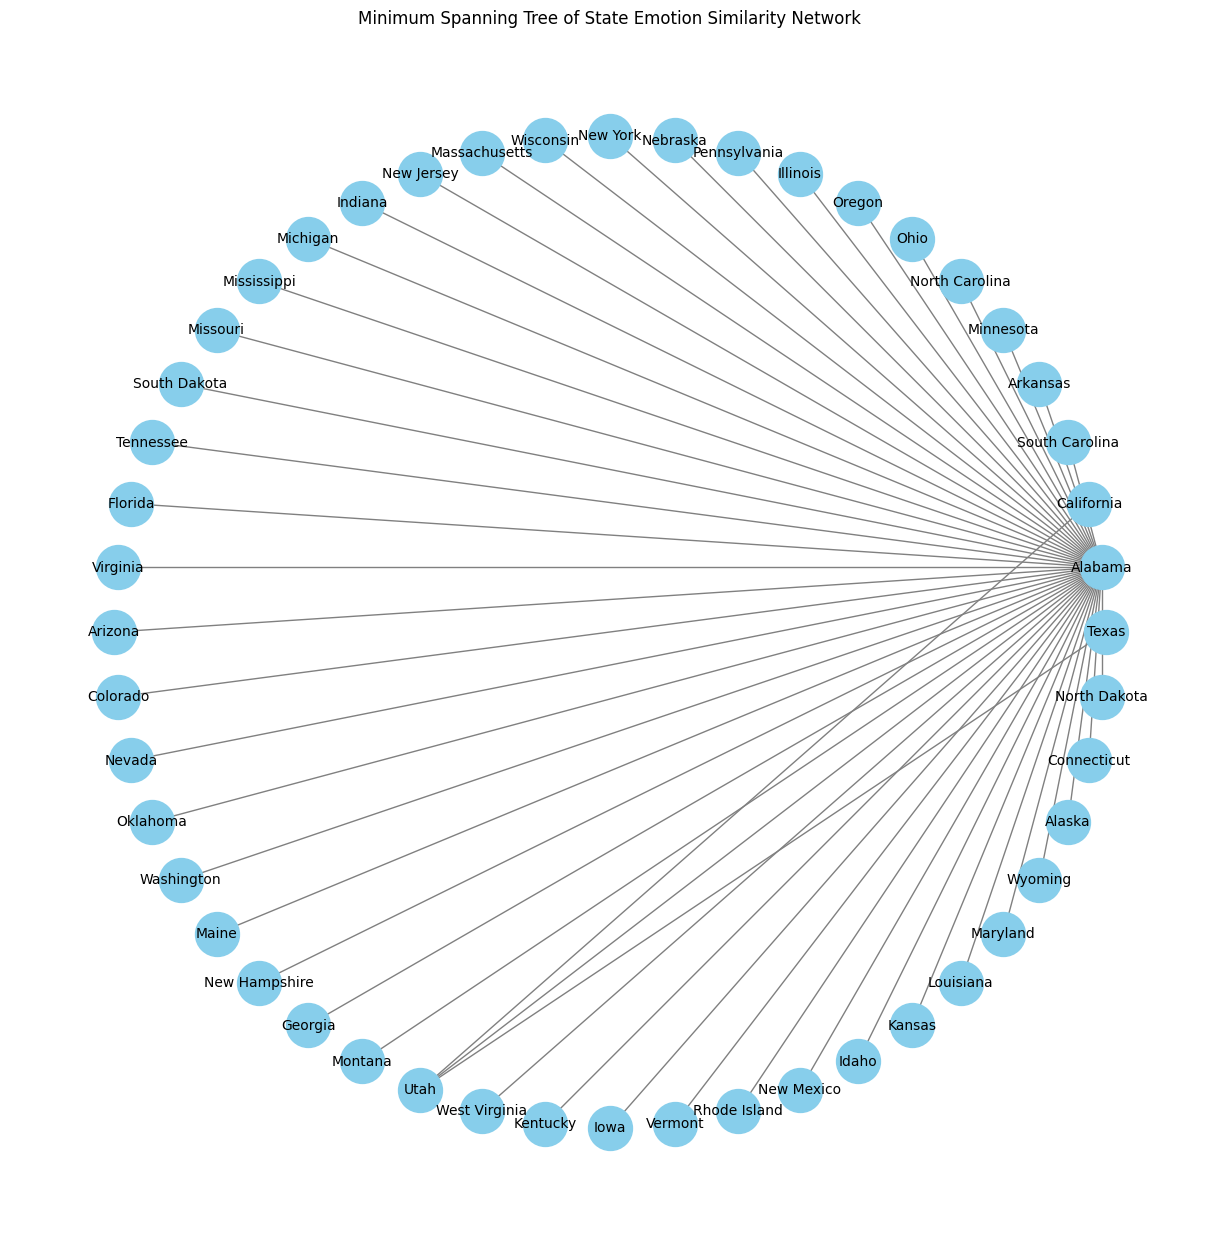

In [ ]:
# Compute the minimum spanning tree
MST = nx.minimum_spanning_tree(G_weighted, weight='weight', algorithm='kruskal')

# Draw the minimum spanning tree
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(MST)
nx.draw(MST, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, width=1.0, edge_color="gray")
plt.title("Minimum Spanning Tree of State Emotion Similarity Network")
plt.show()
